96 48
Epoch 1/200
 - 1s - loss: 47507.9577
Epoch 2/200
 - 0s - loss: 41607.3867
Epoch 3/200
 - 0s - loss: 35652.2310
Epoch 4/200
 - 0s - loss: 29448.9507
Epoch 5/200
 - 0s - loss: 23373.7878
Epoch 6/200
 - 0s - loss: 17686.1450
Epoch 7/200
 - 0s - loss: 12751.2441
Epoch 8/200
 - 0s - loss: 8665.1538
Epoch 9/200
 - 0s - loss: 5578.1245
Epoch 10/200
 - 0s - loss: 3430.1430
Epoch 11/200
 - 0s - loss: 2066.9009
Epoch 12/200
 - 0s - loss: 1290.1853
Epoch 13/200
 - 0s - loss: 867.7076
Epoch 14/200
 - 0s - loss: 675.4547
Epoch 15/200
 - 0s - loss: 585.4035
Epoch 16/200
 - 0s - loss: 555.2482
Epoch 17/200
 - 0s - loss: 546.7328
Epoch 18/200
 - 0s - loss: 547.3985
Epoch 19/200
 - 0s - loss: 538.8399
Epoch 20/200
 - 0s - loss: 538.5293
Epoch 21/200
 - 0s - loss: 536.9765
Epoch 22/200
 - 0s - loss: 536.0236
Epoch 23/200
 - 0s - loss: 537.1176
Epoch 24/200
 - 0s - loss: 535.7788
Epoch 25/200
 - 0s - loss: 538.2013
Epoch 26/200
 - 0s - loss: 538.4628
Epoch 27/200
 - 0s - loss: 538.2216
Epoch 28/200

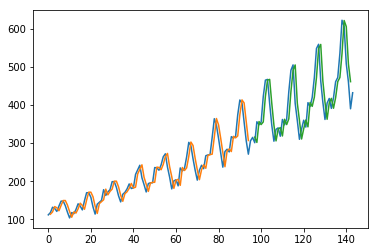

In [3]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(7)

# load the dataset
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()